## Case Study

## Download titanic data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the titanic dataset

In [5]:
d=pd.read_csv("C:/Users/Dell/Desktop/titanic dataset.csv")
d
df=pd.DataFrame(d)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Display the first few rows of the dataset

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2) Find Missing Values, Fill or Drop


In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Fill missing values (example: fill Age with mean)

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#3) Drop variables if needed (example: drop Fare','Embarked')

In [9]:
df=df.drop(columns=['Cabin'])


In [10]:
df.shape

(891, 11)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#4) Label Encoding for Categorical Variables

In [13]:
# Label encoding categorical variables

from sklearn.preprocessing import LabelEncoder

In [14]:
cols=['Sex','Embarked']
l = LabelEncoder()

for col in cols:
    df[col]=l.fit_transform(df[col])

## Visualisation

# Bar plot

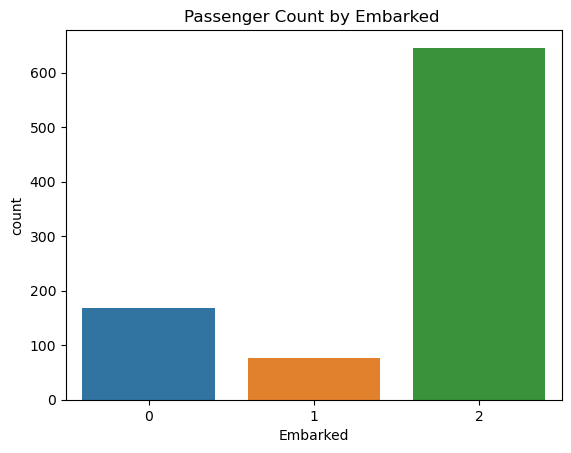

In [18]:
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarked ')
plt.show()

#Scatter Plot:

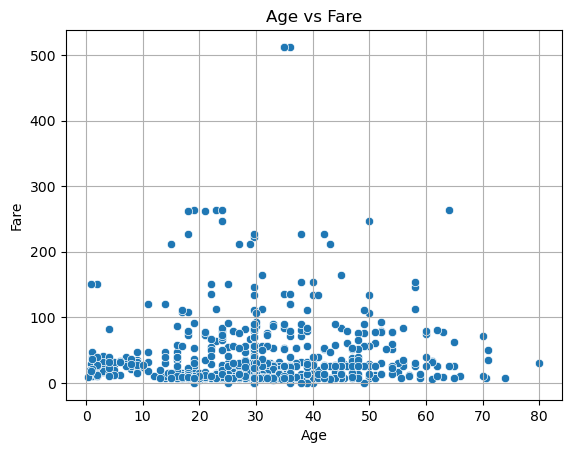

In [19]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.grid()
plt.show()


#Pie chart

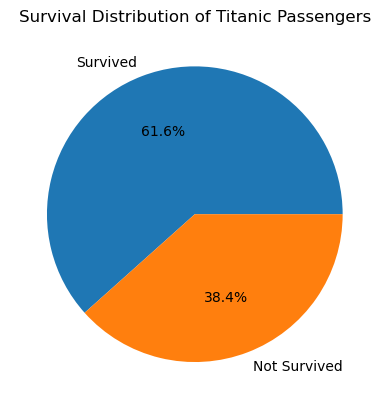

In [20]:
labels = ['Survived','Not Survived']
size=df['Survived'].value_counts()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Survival Distribution of Titanic Passengers')
plt.show()

# Joint bar plot

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

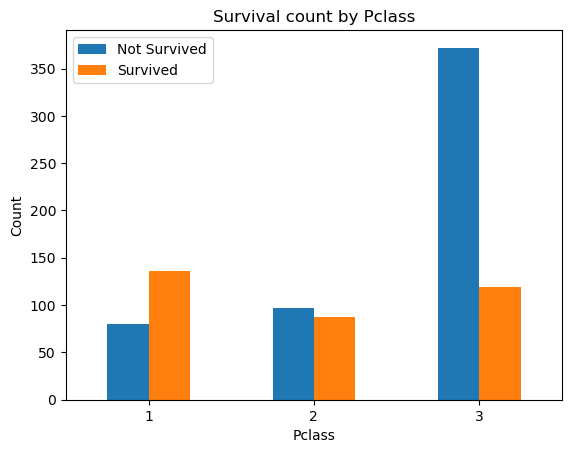

In [22]:
# Group data by Pclass and Survived, count occurrences, and unstack it
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting
grouped.plot(kind='bar', stacked=False)
plt.title('Survival count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.show()


# Model Building

#5) choose dependent & independent variables

In [23]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'],axis=0)
x = df.drop(columns=['Survived'])
y = df['Survived'] #Independent variable

In [24]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


# 6) Split Data into Train and Test Sets (80:20)

In [29]:
# Splitting the data into training and testing sets (80:20 split)

import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test


(     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 331       1    1  45.500000      0      0   28.5000         2
 733       2    1  23.000000      0      0   13.0000         2
 382       3    1  32.000000      0      0    7.9250         2
 704       3    1  26.000000      1      0    7.8542         2
 813       3    0   6.000000      4      2   31.2750         2
 ..      ...  ...        ...    ...    ...       ...       ...
 106       3    0  21.000000      0      0    7.6500         2
 270       1    1  29.699118      0      0   31.0000         2
 860       3    1  41.000000      2      0   14.1083         2
 435       1    0  14.000000      1      2  120.0000         2
 102       1    1  21.000000      0      1   77.2875         2
 
 [712 rows x 7 columns],
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 709       3    1  29.699118      1      1  15.2458         0
 439       2    1  31.000000      0      0  10.5000         2
 840       3    1  20.000000   

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
print(x.shape,X_train.shape,X_test.shape)


(891, 7) (712, 7) (179, 7)


In [34]:
print(y.shape,Y_train.shape,Y_test.shape)

(891,) (712,) (179,)


#7) Import Naive Bay's Algorithm (Gaussian Naive Bay's)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


C:\Users\Dell\.ipython\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()

#8) Fit naive bays model on train data

In [38]:
model.fit(x_train, y_train)

GaussianNB()

#9) Predict Test Data Using Fitted Model

In [39]:
# Predict on the test data

y_predict = model.predict(x_test)

## Model Evaluation

# 10) Find Accuracy

In [41]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


# 11) Find Classification Report

In [42]:
from sklearn.metrics import classification_report
#F1 Score=2×[(Precision+Recall/(Precision×Recall)]
# Generate classification report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



## 12) Find Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_m = confusion_matrix(y_test, y_predict)
print(conf_m)

[[82 23]
 [17 57]]


## Repeat Similar Process for KNN Algorithm and Decision Tree
KNN Algorithm

In [44]:
# Recall

from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)

0.7702702702702703


In [45]:
#Precision

precision = precision_score(y_test, y_predict)
print(precision)

0.7125


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize KNN classifier
k=7
knn_model1 = KNeighborsClassifier(n_neighbors=k)
knn_model1

KNeighborsClassifier(n_neighbors=7)

In [47]:
# Fit the model on the training data

knn_model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
# Predict on the test data and  Calculate accuracy

y_predict = knn_model1.predict(x_test)
y_predict
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.72


In [51]:
# Classification report

print('Classification Report (KNN):')
print(classification_report(y_test, y_pred_knn))

Classification Report (KNN):


NameError: name 'y_pred_knn' is not defined

In [52]:
# Confusion matrix

con_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con_mat)

Confusion Matrix:
[[86 19]
 [31 43]]


In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)

0.581081081081081


In [54]:
precision = precision_score(y_test, y_predict)
print(precision)


0.6935483870967742


## Decision Tree


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [56]:
# Initialize the Decision Tree classifier

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree 

DecisionTreeClassifier(random_state=42)

In [57]:
# Fit the model on the training data

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Predict on the test set
y_predict = dec_tree.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


# Evaluation for KNN

In [59]:
# Display classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [60]:
con_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con_mat)

Confusion Matrix:
[[86 19]
 [18 56]]


In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)


0.7567567567567568


In [62]:
precision = precision_score(y_test, y_predict)
print(precision)


0.7466666666666667


#comparison, # naive boys ,#knn ,#decision tree compair, #accuracy ,#recall ,#precision

In [63]:
# Initialize models
models = {
    "Naive Bayes": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

In [64]:
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

In [65]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

                 Model  Accuracy  Precision    Recall
0          Naive Bayes  0.810056   0.777778  0.756757
1  K-Nearest Neighbors  0.720670   0.693548  0.581081
2        Decision Tree  0.793296   0.746667  0.756757
